In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#reading the file
data=pd.read_csv('spam.csv')
data

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [3]:
#checking the number of entries for each label
data['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

The count for normal mails is 2412 and spam mails is 481.

In [4]:
#checking the shape of the data
data.shape

(2893, 3)

In [5]:
#checking for null values 
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
#replacing null values with space
data['subject'].replace(np.NaN,"",inplace=True)

In [7]:
#checking for null values again
data.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [8]:
data.groupby('label').describe().T

label                                                           0  \
subject count                                                2412   
        unique                                               2194   
        top                                                         
        freq                                                   49   
message count                                                2412   
        unique                                               2401   
        top     ld ' 98 the first international workshop on la...   
        freq                                                    2   

label                                                           1  
subject count                                                 481  
        unique                                                421  
        top                                                        
        freq                                                   13  
message count                                                 481  
        unique                                                458  
        top     this is not spam ; you are receiving this mess...  
        freq                                                    5

We can observe:
    1. There are 2412 normal mails as compared to 481 spam mails.
    2. Top spam message is 'this is not spam.....' which occured 5 times

In [9]:
#checking for duplicates in the data if any
duplicate=data[data.duplicated()]
duplicate

subject  \
496   just released ! 10 million ! ! !   
1166  ld ' 98 - call for participation   
1353                        submit 600   
1438          afro - asiatic languages   
1617                                 .   
1618                             hello   
1735             just released vol . 2   
1810                    business offer   
2013                hi , how are you !   
2052  just released ! 10 million ! ! !   
2214                    special issues   
2375                 romance languages   
2559                              re :   
2575                              re :   
2598                              re :   
2670  submit 600 is definitely for you   
2688                        submit 600   

                                                message  label  
496   it was just released ! ! introducing . . . mil...      1  
1166  ld ' 98 the first international workshop on la...      0  
1353  this is not spam ; you are receiving this mess...      1  
1438  fourth conference on afro-asiatic languages ce...      0  
1617  international driver ' s license need a new dr...      1  
1618  university degree programs - - - - increase yo...      1  
1735  just released ! ! ! introducing . . . the cd v...      1  
1810  i ' m looking for people that have an interest...      1  
2013  dear friend : this is an extremely important a...      1  
2052  it was just released ! ! introducing . . . mil...      1  
2214  names , the journal of the american name socie...      0  
2375  lsrl 29 second call for papers the xxix lingui...      0  
2559  = 20 the virtual girlfriend and virtual boyfri...      1  
2575  = 20 the virtual girlfriend and virtual boyfri...      1  
2598  = 20 the virtual girlfriend and virtual boyfri...      1  
2670  this is not spam ; you are receiving this mess...      1  
2688  this is not spam ; you are receiving this mess...      1

In [10]:
#removing duplicate entries
data.drop_duplicates(inplace=True)
#New shape after dropping the duplicates
data.shape

(2876, 3)

In [11]:
#we will try to understand the spam and normal message with the help of length of the message
data['length']=data['message'].apply(len)

In [12]:
data

subject  \
0               job posting - apple-iss research center   
1                                                         
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  length  
0     content - length : 3386 apple-iss research cen...      0    2856  
1     lang classification grimes , joseph e . and ba...      0    1800  
2     i am posting this inquiry for sergei atamas ( ...      0    1435  
3     a colleague and i are researching the differin...      0     324  
4     earlier this morning i was on the phone with a...      0    1046  
...                                                 ...    ...     ...  
2888  hello thanks for stopping by ! ! we have taken...      1     262  
2889  the list owner of : " kiddin " has invited you...      1    2163  
2890  judging from the return post , i must have sou...      0    1039  
2891  gotcha ! there are two separate fallacies in t...      0    2949  
2892  hello ! i ' m working on a thesis concerning a...      0     700  

[2876 rows x 4 columns]

<AxesSubplot:xlabel='length', ylabel='Density'>

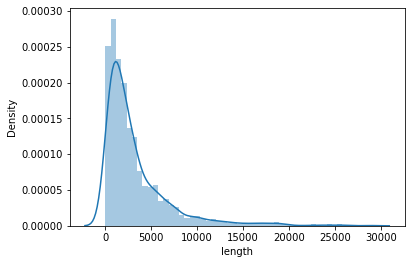

In [13]:
#VISUALIZATION
import seaborn as sns
sns.distplot(data['length'])

We can see the length of messages vary from 0 to around 5000.

In [14]:
#Maximum and minimun length of messages sent
print(data['length'].max())
print('\n',data['length'].min())
#The lengthiest message contains 28649 words and shortest message contains 17 words.

28649

 17


<AxesSubplot:xlabel='label', ylabel='length'>

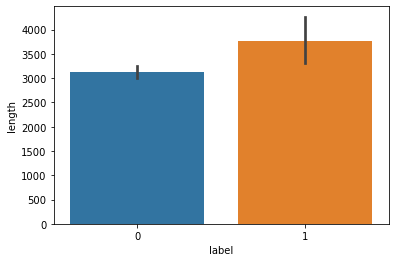

In [15]:
sns.barplot(x=data['label'],y=data['length'])
#The lengthiest normal messsage is around 3000 words and spam message is above 3500.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

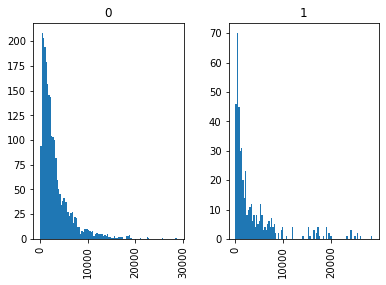

In [17]:
data.hist(column='length',by='label',bins=100)
#spam message are usually of length under 1000 and that of a normal message is around 0-4000.

0    2408
1     468
Name: label, dtype: int64


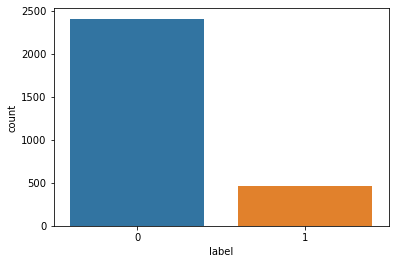

In [18]:
#visualizing the distribution of label column
import matplotlib.pyplot as plt
sns.countplot(data['label'])
print(data['label'].value_counts())

In [19]:
#exploring dataset with Wordcloud
#1. Spam message
spam=data[data.label==1]
spam

subject  \
21                                            free   
38                    the internet success toolbox   
84    free stealth 3 . 0 bulk email software . . .   
85                               need more money ?   
86           cable decsrambler now only $ 6 . 99 !   
...                                            ...   
2884            did that work for you ? - calsvxtn   
2886                 from fanny , recommending nek   
2887                   win $ 300usd and a cruise !   
2888                  love your profile - ysuolvpv   
2889            you have been asked to join kiddin   

                                                message  label  length  
21    this is a multi-part message in mime format . ...      1   18437  
38    note : we do not wish to send e-mail to anyone...      1    7387  
84    just released . . . 30 , 000 , 000 email addre...      1    8172  
85    hi , would you like to earn an extra $ 700 a w...      1   11808  
86    this is really cool ! premium channels and pay...      1    2161  
...                                                 ...    ...     ...  
2884  hello thanks for stopping by ! ! we have taken...      1     262  
2886  dear sir or madam , this is not a " spam " mes...      1    3019  
2887  raquel 's casino , inc . is awarding a cruise ...      1     795  
2888  hello thanks for stopping by ! ! we have taken...      1     262  
2889  the list owner of : " kiddin " has invited you...      1    2163  

[468 rows x 4 columns]

In [20]:
#creating a list of words from the message column of spam entries
spam_list=" ".join(spam.message.to_numpy().tolist())

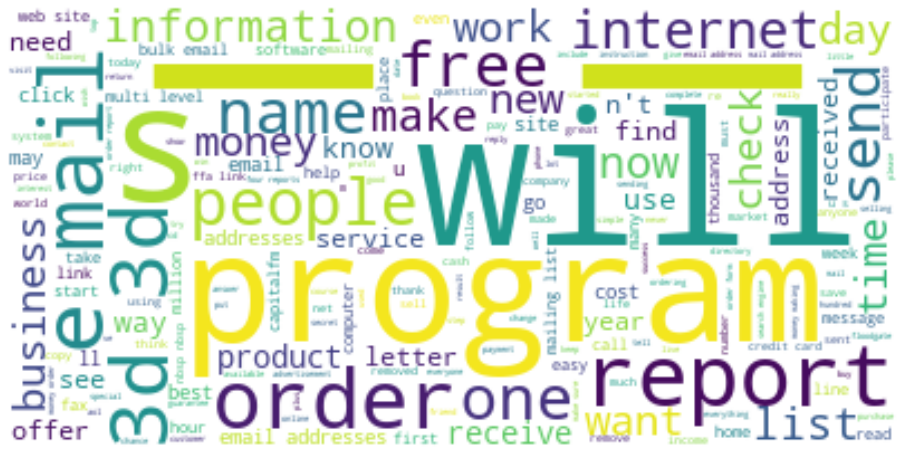

In [22]:
# wordcloud of spam messages

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

spam_msg_cloud = WordCloud(stopwords=STOPWORDS,max_font_size=160, background_color ="white").generate(spam_list)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Spam message wordcloud shows that 'free', 'order', 'click' , 'recieve' ,'call', 'money', 'report', 'offer', 'now' are frequently occuring words in spam messages.

In [23]:
#Checking the word cloud for normal messages
normal=data[data.label==0]
data.head()

subject  \
0            job posting - apple-iss research center   
1                                                      
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [24]:
normal_list=" ".join(normal.message.to_numpy().tolist())

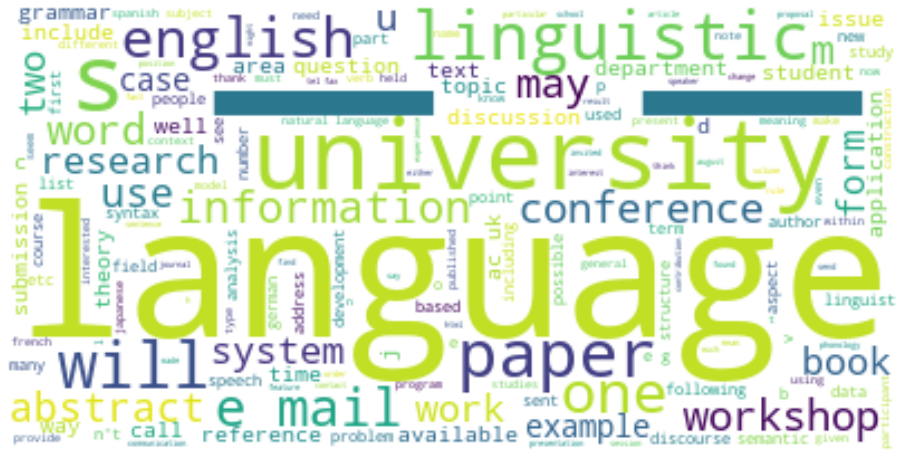

In [25]:
# wordcloud of normal messages
normal_msg_cloud = WordCloud(stopwords=STOPWORDS,max_font_size=160, background_color ="white").generate(normal_list)
plt.figure(figsize=(16,10))
plt.imshow(normal_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Normal message wordcloud shows that 'language', 'linguistic' , 'information' ,'abstract', 'workshop', 'conference', 'english', 'work' are frequently occuring words in normal messages.

In [26]:
from nltk.corpus import stopwords 
import re 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
#Data Pre-processing and cleaning
#defining a function to clean the data
lem=WordNetLemmatizer()
def process(text):
    #1. Removing punctuation, numbers, urls.
    clean_text=re.sub('[^a-zA-Z]',' ',text)
    
    #2. Lowercase the words
    clean_text=clean_text.lower()
    
    #3. Spktting the words
    clean_text=clean_text.split()
    
    #4. Removing stopwords
    clean_text=[lem.lemmatize(word) for word in clean_text if not word in stopwords.words('english')]
    clean_text=' '.join(clean_text)
    
    #5 return clean text
    return clean_text

In [28]:
data['subject']=data['subject'].apply(process)

In [29]:
data['message']=data['message'].apply(process)

In [30]:
data

subject  \
0            job posting apple i research center   
1                                                  
2     query letter frequency text identification   
3                                           risk   
4                       request book information   
...                                          ...   
2888                       love profile ysuolvpv   
2889                           asked join kiddin   
2890                 anglicization composer name   
2891         comparative method n ary comparison   
2892                  american english australia   

                                                message  label  length  
0     content length apple i research center u milli...      0    2856  
1     lang classification grime joseph e barbara f g...      0    1800  
2     posting inquiry sergei atamas satamas umabnet ...      0    1435  
3     colleague researching differing degree risk pe...      0     324  
4     earlier morning phone friend mine living south...      0    1046  
...                                                 ...    ...     ...  
2888  hello thanks stopping taken many new pic made ...      1     262  
2889  list owner kiddin invited join mailing list li...      1    2163  
2890  judging return post must sounded like kind sel...      0    1039  
2891  gotcha two separate fallacy argument n ary com...      0    2949  
2892  hello working thesis concerning attitude towar...      0     700  

[2876 rows x 4 columns]

In [31]:
x=data['subject']+data['message']
x

0       job posting apple i research centercontent len...
1       lang classification grime joseph e barbara f g...
2       query letter frequency text identificationpost...
3       riskcolleague researching differing degree ris...
4       request book informationearlier morning phone ...
                              ...                        
2888    love profile ysuolvpvhello thanks stopping tak...
2889    asked join kiddinlist owner kiddin invited joi...
2890    anglicization composer namejudging return post...
2891    comparative method n ary comparisongotcha two ...
2892    american english australiahello working thesis...
Length: 2876, dtype: object

In [32]:
#implementing Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv=CountVectorizer()
x=cv.fit_transform(x).toarray()

In [34]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
y=data['label']

In [36]:
#splitting the data using train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=33)

In [37]:
print(x_train.shape,'\t',x_test.shape)

(2300, 53519) 	 (576, 53519)


In [38]:
#training the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV

In [39]:
Model=[]
Model.append(('RandomForestClassifier',RandomForestClassifier()))
Model.append(('MultinomialNB',MultinomialNB()))
Model.append(('SVC',SVC()))
Model.append(('DecisionTreeClassifier',DecisionTreeClassifier()))

RandomForestClassifier :

RandomForestClassifier()


Accuracy Score:  0.9826388888888888


F1 score: 0.9418604651162791
Cross Val Score:  0.9753109903381642


AUC_ROC_Score 0.9489711934156377


[[485   1]
 [  9  81]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       486
           1       0.99      0.90      0.94        90

    accuracy                           0.98       576
   macro avg       0.98      0.95      0.97       576
weighted avg       0.98      0.98      0.98       576



AxesSubplot(0.125,0.808774;0.775x0.0712264)


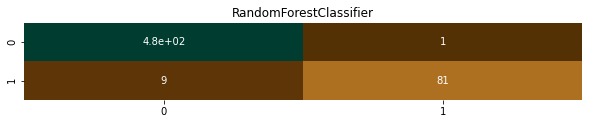

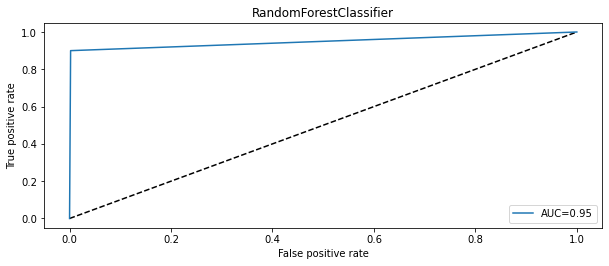



MultinomialNB :

MultinomialNB()


Accuracy Score:  0.9913194444444444


F1 score: 0.9726775956284154
Cross Val Score:  0.9864396135265702


AUC_ROC_Score 0.9903292181069959


[[482   4]
 [  1  89]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       486
           1       0.96      0.99      0.97        90

    accuracy                           0.99       576
   macro avg       0.98      0.99      0.98       576
weighted avg       0.99      0.99      0.99       576



AxesSubplot(0.125,0.808774;0.775x0.0712264)


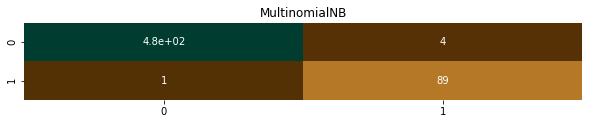

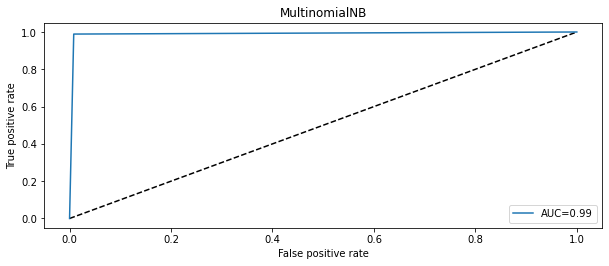



SVC :

SVC()


Accuracy Score:  0.953125


F1 score: 0.8235294117647058
Cross Val Score:  0.9447149758454106


AUC_ROC_Score 0.85


[[486   0]
 [ 27  63]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       486
           1       1.00      0.70      0.82        90

    accuracy                           0.95       576
   macro avg       0.97      0.85      0.90       576
weighted avg       0.96      0.95      0.95       576



AxesSubplot(0.125,0.808774;0.775x0.0712264)


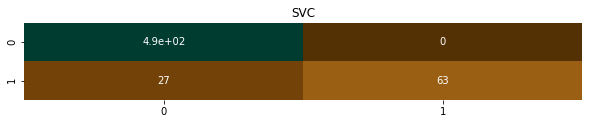

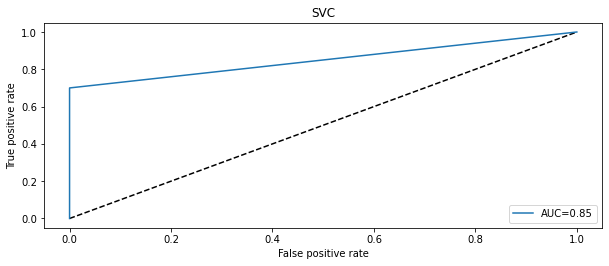



DecisionTreeClassifier :

DecisionTreeClassifier()


Accuracy Score:  0.9618055555555556


F1 score: 0.8804347826086957
Cross Val Score:  0.9523641304347826


AUC_ROC_Score 0.9366255144032921


[[473  13]
 [  9  81]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       486
           1       0.86      0.90      0.88        90

    accuracy                           0.96       576
   macro avg       0.92      0.94      0.93       576
weighted avg       0.96      0.96      0.96       576



AxesSubplot(0.125,0.808774;0.775x0.0712264)


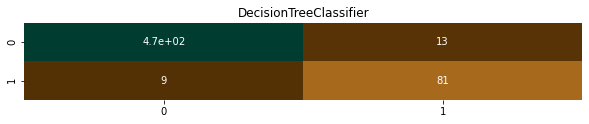

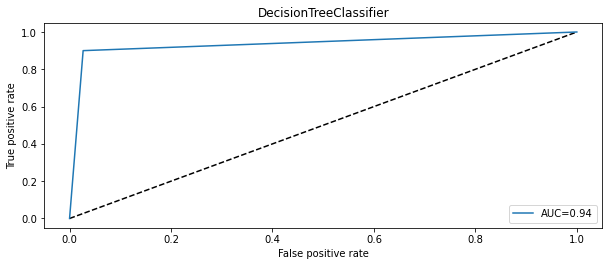

In [42]:
Models=[]
Score=[]
CVS=[]
Roc_Score=[]
F1=[]

for name,model in Model:
    print(name,':\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score: ',AS)
    Score.append(AS*100)
    print('\n')
    
    #F1 score
    f1=f1_score(y_test,pred)
    print('F1 score:',f1)
    F1.append(f1)
    
    #cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score: ',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Roc_Score.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='BrBG'))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [43]:
pd.DataFrame({"Model":Model,"Accuracy Score":Score,"F1 Score":F1,'Cross Val Score':CVS,'ROC_AUC_Score':Roc_Score})

Model  Accuracy Score  \
0  (RandomForestClassifier, (DecisionTreeClassifi...       98.263889   
1                   (MultinomialNB, MultinomialNB())       99.131944   
2                                       (SVC, SVC())       95.312500   
3  (DecisionTreeClassifier, DecisionTreeClassifie...       96.180556   

   F1 Score  Cross Val Score  ROC_AUC_Score  
0  0.941860        97.531099      94.897119  
1  0.972678        98.643961      99.032922  
2  0.823529        94.471498      85.000000  
3  0.880435        95.236413      93.662551

In [44]:
#Saving MultinomialNB as it has accuracy score of 0.99 cross val score of 0.98, F1 score 0.97. 
import joblib
joblib.dump(MultinomialNB(),'spam_detection.pkl')

['spam_detection.pkl']